# Simple two layer neural network

### Code implented has inspiration from:
<cite>http://cs231n.github.io/assignments2018/assignment1/</cite>

### Imports

In [1]:
import os
import random
import matplotlib.pylab as plt
from glob import glob
from neural_net import TwoLayerNet
from image_import import import_images
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Making training, validation and test data 

In [2]:
SOURCE_IMAGES_POT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kartofler/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/potato'
SOURCE_IMAGES_CAT = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/kat_laks/still' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/catfood'
SOURCE_IMAGES_TAB = '/home/mikkel/Documents/github/BSc-PRO/images_1280x720/baggrund/bevægelse' # '/home/mikkel/Documents/github/BSc-PRO/imgs_resize/table

AUG_IMAGES_POT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/potato'
AUG_IMAGES_CAT    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/catfood'
AUG_IMAGES_TAB    = '/home/mikkel/Documents/github/BSc-PRO/DataAugment/table'

images_pot        = glob(os.path.join(SOURCE_IMAGES_POT, "*.jpg"))
images_cat        = glob(os.path.join(SOURCE_IMAGES_CAT, "*.jpg"))
images_tab        = glob(os.path.join(SOURCE_IMAGES_TAB, "*.jpg"))

images_aug_pot    = glob(os.path.join(AUG_IMAGES_POT, "*.jpeg"))
images_aug_cat    = glob(os.path.join(AUG_IMAGES_CAT, "*.jpeg"))
images_aug_tab    = glob(os.path.join(AUG_IMAGES_TAB, "*.jpeg"))

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_pot, images_cat, images_tab)

### Train without dataaugmentation

In [4]:
input_size = 224 * 224 * 3
hidden_size = 500
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# Predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.324459
iteration 100 / 1000: loss 0.681643
iteration 200 / 1000: loss 0.626733
iteration 300 / 1000: loss 0.765354
iteration 400 / 1000: loss 0.693600
iteration 500 / 1000: loss 0.644865
iteration 600 / 1000: loss 0.599418
iteration 700 / 1000: loss 0.634067
iteration 800 / 1000: loss 0.762077
iteration 900 / 1000: loss 0.632866
('Validation accuracy: ', 0.8)
('Test accuracy: ', 0.84)


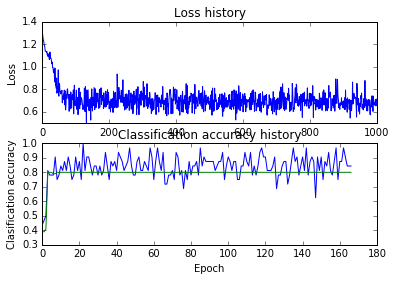

In [5]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [6]:
y_pred, score = net.predict(X_val, show_score=True)
print("Score: ", score[0:4])
print("Valdiation: ", y_val[0:4])
print("Prediction: ", y_pred[0:4])

('Score: ', array([[0.36406073, 0.37622479, 0.25971448],
       [0.13841829, 0.13209897, 0.72948274],
       [0.07632999, 0.07614315, 0.84752686],
       [0.05243532, 0.05243414, 0.89513055]]))
('Valdiation: ', array([0, 0, 2, 2]))
('Prediction: ', array([1, 2, 2, 2]))


### Train with dataaugmentation

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = import_images(images_aug_pot, images_cat, images_tab, 
                                                               augmented=True, path_aug_potato=images_aug_pot, 
                                                               path_aug_catfood=images_aug_cat, 
                                                               path_aug_table=images_aug_tab)

MemoryError: 

In [ ]:
input_size = 224 * 224 * 3
hidden_size = 50
num_classes = 3
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=32,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.3, verbose=True)

# Predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

### Hyperparameter optimization

In [ ]:
best_net = None # store the best model into this 
best_val = -1
results = {}

learning_rate = [1e-1, 1e-2] 
learning_rate_decay = [0.91, 0.95]
regularization_strengths =  [0.3, 1, 10] 
hidden_layers = [50, 500] 

for lr in learning_rate:
    for lrd in learning_rate_decay:
        for rs in regularization_strengths:
            for hl in hidden_layers:
                net = TwoLayerNet(input_size, hl, num_classes)

                # Train the network
                net.train(X_train, y_train, X_val, y_val, num_iters=100, batch_size=35, learning_rate=lr, learning_rate_decay=lrd, reg=rs, verbose=True)
                y_train_pred = net.predict(X_train)
                y_val_pred = net.predict(X_val)
                
                # Calculates accuraccy
                y_train_acc = np.mean(y_train == y_train_pred)
                y_pred_acc = np.mean(y_val == y_val_pred)
                results[(lr, lrd, rs, hl)] = (y_train_acc, y_pred_acc) # stores results in tuple
                # Stores the best results
                if y_pred_acc > best_val:
                    best_val = y_pred_acc
                    best_net = net

for lr, lrd, rs, hl in sorted(results):
    train_accuracy, val_accuracy = results[(lr, lrd, rs, hl)]
    print('lr %e lrd %e rs %e hl %e train accuracy: %f val accuracy: %f' % (
                lr, lrd, rs, hl, train_accuracy, val_accuracy))                    